<h1 style="text-align: center;">Spotify Clustering Application</h1>

***
## Table of Contents
1. [Abstract](#Abstract)
2. [Data Preprocessing](#Data-Preprocessing)<br>
    2.1. [Data Selection](#Data-Selection)<br>
    2.2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
    2.3. [Normalization](#Normalization)<br>
3. [Unsupervised Learning Models Used](#Unsupervised-Learning-Models-Used)<br>
    3.1. [PCA](#PCA)<br>
    3.1. [K-Means](#K-Means)<br>
    3.2. [Agglomerative Clustering](#Agglomerative-Clustering)<br>
3. [Discussion](#Discussion)
4. [Conclusions](#Conclusions)

## Abstract

This notebook aims to find clusters in a quite varied, custom-made playlist using all the functionalities of [Spotify for developers Console](https://developer.spotify.com/console/). The data comes from statistics produced by my personal Spotify account. Some of the preprocessing steps taken in this project is feature normalization testing with both StandardScaler and MinMax Scaler. Following to that, dimensionality reduction was performed to remove redundant and highly correlated features in the dataset and to reduce the overall noise in the data. Finally, Kmeans and Agglomerative Clustering were used to find such clusters. 

At this point, the models require improvement as none of them produced the results expected. Couple of things that should be taken as next steps are data balancing and outlier removal.

## Data Preprocessing

### Data Selection

#### Playlist data
[Return to top](#Spotify-Clustering-Application)

The [**UL Project playlist**](https://open.spotify.com/playlist/7ybnDCJsXDsye0stN030Vx) is a combination of 760 songs of other personal 'mood playlists' and 280 of randomly selected songs. Both the songs and features were fetched from Spotify for Developers' Console. It's important to note that this playlist has a wide variety of genres. The rough distribution goes as follows: 

* 760 of songs **based on a combination of other personal playlists**
    * R&B/Soul/Indie Pop/Rap/Hip-Hop/Trap Latino/Balads/Salsa/Merengue/Vallenato/Bachata
* 280 songs **randomly selected**
    * Pop Latino/Banda/Heavy Metal/Country
    
This should translate several groupigs within our data, we are interested to see how these songs relate to each other based on their features.

#### Getting the playlist

Within Spotify for Developers console, the data was fetched from [**"Get playlist Items"**](https://developer.spotify.com/console/get-playlist-tracks/) section. To get the items of my personal playlist, the console requires us to fill the following fields: 
* `playlist_id` : **7ybnDCJsXDsye0stN030Vx**
    - A string of letters and numbers found at the end of the playlist' URL
    
    
* `fields` : **items(track(artists,id,name,popularity))**
    - Fields of interest about the data. For the purpose of the project, it was narrowed down to **track_id, track_name, artist_id, artist_name, track_popularity**.
    
    
* `offset` : **Batches of 100s, starting from index 0 to 1040**
    - The index of the first item to return. Default: 0 (the first item). The console has a limit of 100 songs per request, therefore it has to be adjusted accordingly to get 1040 songs and should result in 10 data files for that number of songs.

Once the fields are filled, the console autogenerates the `curl "GET"` command with the characteristics specified above to access the data through anaconda command prompt. An example is shown below:

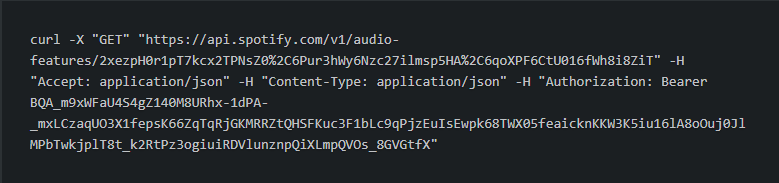

As we can observe in the picture above, the data being fetched comes in a JSON format. This was later stored and converted to csv format.

#### Getting the features
[Return to top](#Spotify-Clustering-Application)

The csv files were concatenated, which allowed to see the full picture of the playlist' items. The **"track_id"** in particular, is of our interest in this section to obtain the features. Within Spotify for Developers console, this time we go to [**"Get Tracks' Audio Features"**](https://developer.spotify.com/console/get-audio-features-several-tracks/). The console requires us to fill an "id field":
* `id` : **Up to 100 Comma-separated track ids.**

Which outputs the following in the console: 
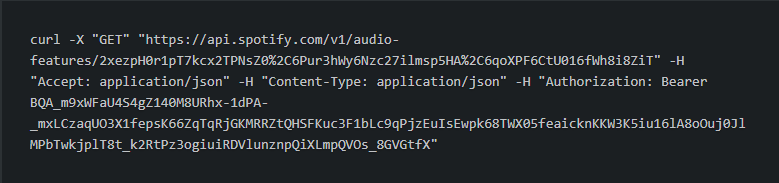

Same as the track items, we obtain a `curl GET` command, this time with the track features for us to place in the anaconda command prompt. The features come in a JSON format which were later converted to csv.

Accoding to [**Spotify API documentation**](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features), the songs are described using 14 different features. These are defined as follows:

* **Track Popularity**: How pular a song is. The higher, the more popular the song is.

* **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

* **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* **Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

* **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **Instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **Key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

* **Mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **Duration**: The duration of the track in milliseconds.

* **Time Signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

[Return to top](#Spotify-Clustering-Application)

In [1]:
import pandas as pd 
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

### Getting the playlist
[Return to top](#Spotify-Clustering-Application)

In [2]:
#Paths for liked songs files
path = r'C:\Users\Owner\Documents\RRC\F2022FA\UML\Spotify\Project\CSV Files\Songs'
all_files = glob.glob(os.path.join(path, "*.csv"))

#Create a list to store csvs' contents
contents = []

#Read each csv file and append to 'contents' list
for filename in all_files:
    filename
    df = pd.read_csv(filename, index_col=None, header=0)
    contents.append(df)

playlist = pd.concat(contents, axis=0, ignore_index=True)
playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   items/track/artists/0/external_urls/spotify  1040 non-null   object
 1   items/track/artists/0/href                   1040 non-null   object
 2   items/track/artists/0/id                     1040 non-null   object
 3   items/track/artists/0/name                   1040 non-null   object
 4   items/track/artists/0/type                   1040 non-null   object
 5   items/track/artists/0/uri                    1040 non-null   object
 6   items/track/id                               1040 non-null   object
 7   items/track/name                             1040 non-null   object
 8   items/track/popularity                       1040 non-null   int64 
 9   items/track/artists/1/external_urls/spotify  283 non-null    object
 10  items/track/

In [3]:
playlist.head()

,items/track/artists/0/external_urls/spotify,items/track/artists/0/href,items/track/artists/0/id,items/track/artists/0/name,items/track/artists/0/type,items/track/artists/0/uri,items/track/id,items/track/name,items/track/popularity,items/track/artists/1/external_urls/spotify,...,items/track/artists/5/id,items/track/artists/5/name,items/track/artists/5/type,items/track/artists/5/uri,items/track/artists/6/external_urls/spotify,items/track/artists/6/href,items/track/artists/6/id,items/track/artists/6/name,items/track/artists/6/type,items/track/artists/6/uri
0,https://open.spotify.com/artist/0AAwRFgXtxXhHb...,https://api.spotify.com/v1/artists/0AAwRFgXtxX...,0AAwRFgXtxXhHbiMS9W9DL,Aolani,artist,spotify:artist:0AAwRFgXtxXhHbiMS9W9DL,3UBd89AndwOYzfi2mTM0Ne,Medicate for You,34,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://open.spotify.com/artist/5XNCS8lVEpHHba...,https://api.spotify.com/v1/artists/5XNCS8lVEpH...,5XNCS8lVEpHHbaHv0EabAj,April + VISTA,artist,spotify:artist:5XNCS8lVEpHHbaHv0EabAj,5yeLepyINbTDBadOF56V7i,Own2,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://open.spotify.com/artist/5Vuvs6Py2JRU7W...,https://api.spotify.com/v1/artists/5Vuvs6Py2JR...,5Vuvs6Py2JRU7WiFDVsI7J,Lucky Daye,artist,spotify:artist:5Vuvs6Py2JRU7WiFDVsI7J,3Yt0liwMgB3I0xv3FQBDzI,Buying Time,48,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://open.spotify.com/artist/4frXpPxQQZwbCu...,https://api.spotify.com/v1/artists/4frXpPxQQZw...,4frXpPxQQZwbCu3eTGnZEw,Thundercat,artist,spotify:artist:4frXpPxQQZwbCu3eTGnZEw,7dZ83x0X0QnZfm1mvJ83bn,Fair Chance,54,https://open.spotify.com/artist/7c0XG5cIJTrrAg...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://open.spotify.com/artist/3QTDHixorJelOL...,https://api.spotify.com/v1/artists/3QTDHixorJe...,3QTDHixorJelOLxoxcjqGx,SiR,artist,spotify:artist:3QTDHixorJelOLxoxcjqGx,0wY9rA9fJkuESyYm9uzVK5,D'Evils,65,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Drop columns that are not needed
playlist.drop(playlist.iloc[:,:2] & playlist.iloc[:,4:6] & playlist.iloc[:,9:],axis=1,inplace=True)
playlist

,items/track/artists/0/id,items/track/artists/0/name,items/track/id,items/track/name,items/track/popularity
0,0AAwRFgXtxXhHbiMS9W9DL,Aolani,3UBd89AndwOYzfi2mTM0Ne,Medicate for You,34
1,5XNCS8lVEpHHbaHv0EabAj,April + VISTA,5yeLepyINbTDBadOF56V7i,Own2,38
2,5Vuvs6Py2JRU7WiFDVsI7J,Lucky Daye,3Yt0liwMgB3I0xv3FQBDzI,Buying Time,48
3,4frXpPxQQZwbCu3eTGnZEw,Thundercat,7dZ83x0X0QnZfm1mvJ83bn,Fair Chance,54
4,3QTDHixorJelOLxoxcjqGx,SiR,0wY9rA9fJkuESyYm9uzVK5,D'Evils,65
...,...,...,...,...,...
1035,65HuWBUC1d8ty1q6J42Nfi,Cultura Profética,0WtBYZlCYJqYO2eTIG4tb3,La Complicidad,0
1036,65HuWBUC1d8ty1q6J42Nfi,Cultura Profética,2ZrvHqGJGi75mWqq0cEwo3,Para Estar,0
1037,65HuWBUC1d8ty1q6J42Nfi,Cultura Profética,6chMn4cXB2AkcDMjcsVixg,Ilegal,0
1038,5oYHL2SijkMY52gKIhYJNb,Elefante,1lS060MuE8QTmDPFXhSCD3,Durmiendo con la Luna,66


In [5]:
#Rename and reorganize columns
playlist.set_axis(['artist_id', 'artist_name', 'track_id', 'track_name', 'track_popularity'], axis=1, inplace=True)
playlist = playlist.iloc[:,[2,3,0,1,4]]
playlist

,track_id,track_name,artist_id,artist_name,track_popularity
0,3UBd89AndwOYzfi2mTM0Ne,Medicate for You,0AAwRFgXtxXhHbiMS9W9DL,Aolani,34
1,5yeLepyINbTDBadOF56V7i,Own2,5XNCS8lVEpHHbaHv0EabAj,April + VISTA,38
2,3Yt0liwMgB3I0xv3FQBDzI,Buying Time,5Vuvs6Py2JRU7WiFDVsI7J,Lucky Daye,48
3,7dZ83x0X0QnZfm1mvJ83bn,Fair Chance,4frXpPxQQZwbCu3eTGnZEw,Thundercat,54
4,0wY9rA9fJkuESyYm9uzVK5,D'Evils,3QTDHixorJelOLxoxcjqGx,SiR,65
...,...,...,...,...,...
1035,0WtBYZlCYJqYO2eTIG4tb3,La Complicidad,65HuWBUC1d8ty1q6J42Nfi,Cultura Profética,0
1036,2ZrvHqGJGi75mWqq0cEwo3,Para Estar,65HuWBUC1d8ty1q6J42Nfi,Cultura Profética,0
1037,6chMn4cXB2AkcDMjcsVixg,Ilegal,65HuWBUC1d8ty1q6J42Nfi,Cultura Profética,0
1038,1lS060MuE8QTmDPFXhSCD3,Durmiendo con la Luna,5oYHL2SijkMY52gKIhYJNb,Elefante,66


### Getting the features
[Return to top](#Spotify-Clustering-Application)

In [6]:
#Extract track id and convert into a comma separated string
t_id = list(playlist['track_id'])

#Separate the ids into groups of 100s
def groups_of_100(l, n):
     
    #looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]

#Number of elements each list should have
n = 100
id_list = list(groups_of_100(t_id, n))

#Convert list into a comma separated string
for i in range(len(id_list)):
    print('Batch#', i,'\nLenght:', len(id_list[i]))
    id_str = ','.join(id_list[i])
    print(id_str, '\n')

Batch# 0 
Lenght: 100
3UBd89AndwOYzfi2mTM0Ne,5yeLepyINbTDBadOF56V7i,3Yt0liwMgB3I0xv3FQBDzI,7dZ83x0X0QnZfm1mvJ83bn,0wY9rA9fJkuESyYm9uzVK5,4Z5Bwienk09FUgwsMlsPwJ,384TJj6XyHUyNlCbdgm6Sz,12sXX3cUzBCpwjIzqBYIw1,0VGgkl6AAAmr6V2jvG98CZ,7wnj1zRcZVlPNJ58shwl7h,0W0qBaCp84sKDlQdvShs9n,1wQxWFfARHkHVPd9PnZiKU,6CMYCujHKYkgEqjTSOzYTa,4e0nFC5a95gFWJUzrQ8ggy,5QDiaIPUAFXD22LJakFHfH,5XMtZsNkezcv695DQSZo0L,3FImu2LpSuH6gDHBuFgIbS,4fVXcxsXPW5lhy5ut9biHB,4NevvmFYtCLxRvhAcNVhOB,73fsiKPnqoUz3VftCKUvgM,2R1KuuKco4inMHPfNmRDgJ,3TSi3kAdU1PLg3bEQbMKes,4set4jw2EwxwKDyC6gRpYh,31UPS6TZYhhNFnTlie5gpB,7cMt0t1LWZGPOxOP4Q86dC,5MqEEjr2wJSgclf95bnjyl,3Dj6Ay3LQ1qOJwLAx7Uytu,6p33cYl5rlXBhc49DTxGmy,1UOetxsHH54HcvovvtPkmX,7rlKjHvYFlAjMIUDY1CMLu,4CYBfRX3oEPni9Elqm8Bnt,5t3Vk8bRKylx4fjj7qlbib,7iqQz931tn59mK6IZ3knRx,7kU3HeAcYkI0zYGlMQY9QG,0GGfGINoVYiSFXPOjg3RHj,1IjeGPU5hqHlJpm00zObN7,7GPstnufSTScEaw9dMxO9H,5wXQFi7alwkKVf7PdYb3Co,6EsOT4Yq4BavQSJ4sEe9dw,7z6VTwkfEhX25WWy1xC75O,62d6YXEYxmMWAuLpw1EysL,5QvU2zJrEVw1gAVL4D4iLj,5OGs816LFBGj

In [7]:
#Paths for liked songs files
path = r'C:\Users\Owner\Documents\RRC\F2022FA\UML\Spotify\Project\CSV Files\Features'
all_files = glob.glob(os.path.join(path, "*.csv"))

#Create a list to store csvs' contents
contents = []

#Read each csv file and append to 'contents' list
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    contents.append(df)

features = pd.concat(contents, axis=0, ignore_index=True)
features.to_csv('features_data.csv')
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   audio_features/danceability      1040 non-null   float64
 1   audio_features/energy            1040 non-null   float64
 2   audio_features/key               1040 non-null   int64  
 3   audio_features/loudness          1040 non-null   float64
 4   audio_features/mode              1040 non-null   int64  
 5   audio_features/speechiness       1040 non-null   float64
 6   audio_features/acousticness      1040 non-null   float64
 7   audio_features/instrumentalness  1040 non-null   float64
 8   audio_features/liveness          1040 non-null   float64
 9   audio_features/valence           1040 non-null   float64
 10  audio_features/tempo             1040 non-null   float64
 11  audio_features/type              1040 non-null   object 
 12  audio_features/id   

In [8]:
features.head()

,audio_features/danceability,audio_features/energy,audio_features/key,audio_features/loudness,audio_features/mode,audio_features/speechiness,audio_features/acousticness,audio_features/instrumentalness,audio_features/liveness,audio_features/valence,audio_features/tempo,audio_features/type,audio_features/id,audio_features/uri,audio_features/track_href,audio_features/analysis_url,audio_features/duration_ms,audio_features/time_signature
0,0.792,0.605,6,-4.407,0,0.0341,0.7860,0.000000,0.0877,0.900,129.921,audio_features,0muI8DpTEpLqqibPm3sKYf,spotify:track:0muI8DpTEpLqqibPm3sKYf,https://api.spotify.com/v1/tracks/0muI8DpTEpLq...,https://api.spotify.com/v1/audio-analysis/0muI...,212973,4
1,0.771,0.534,0,-8.464,1,0.0587,0.0363,0.000000,0.0827,0.862,135.363,audio_features,1fxctdOU43CERoGO2aHauA,spotify:track:1fxctdOU43CERoGO2aHauA,https://api.spotify.com/v1/tracks/1fxctdOU43CE...,https://api.spotify.com/v1/audio-analysis/1fxc...,225893,4
2,0.764,0.739,1,-6.422,1,0.0574,0.4030,0.000000,0.0821,0.770,132.995,audio_features,0jr6tT2vc4cIFPHb6wufG3,spotify:track:0jr6tT2vc4cIFPHb6wufG3,https://api.spotify.com/v1/tracks/0jr6tT2vc4cI...,https://api.spotify.com/v1/audio-analysis/0jr6...,252253,4
3,0.880,0.443,9,-8.542,0,0.0588,0.1340,0.000000,0.0369,0.815,119.814,audio_features,1SEUuVeY2PfXGmr2GKOYVH,spotify:track:1SEUuVeY2PfXGmr2GKOYVH,https://api.spotify.com/v1/tracks/1SEUuVeY2PfX...,https://api.spotify.com/v1/audio-analysis/1SEU...,313000,4
4,0.878,0.594,0,-6.548,1,0.0443,0.1350,0.000077,0.0692,0.916,134.718,audio_features,6YhrPNvIJga1ACuEmsyaPO,spotify:track:6YhrPNvIJga1ACuEmsyaPO,https://api.spotify.com/v1/tracks/6YhrPNvIJga1...,https://api.spotify.com/v1/audio-analysis/6Yhr...,221080,4


In [9]:
#Drop columns that are not needed
features.drop(features.iloc[:,11:12] & features.iloc[:,13:16] ,axis=1,inplace=True)
features

,audio_features/danceability,audio_features/energy,audio_features/key,audio_features/loudness,audio_features/mode,audio_features/speechiness,audio_features/acousticness,audio_features/instrumentalness,audio_features/liveness,audio_features/valence,audio_features/tempo,audio_features/id,audio_features/duration_ms,audio_features/time_signature
0,0.792,0.605,6,-4.407,0,0.0341,0.7860,0.000000,0.0877,0.900,129.921,0muI8DpTEpLqqibPm3sKYf,212973,4
1,0.771,0.534,0,-8.464,1,0.0587,0.0363,0.000000,0.0827,0.862,135.363,1fxctdOU43CERoGO2aHauA,225893,4
2,0.764,0.739,1,-6.422,1,0.0574,0.4030,0.000000,0.0821,0.770,132.995,0jr6tT2vc4cIFPHb6wufG3,252253,4
3,0.880,0.443,9,-8.542,0,0.0588,0.1340,0.000000,0.0369,0.815,119.814,1SEUuVeY2PfXGmr2GKOYVH,313000,4
4,0.878,0.594,0,-6.548,1,0.0443,0.1350,0.000077,0.0692,0.916,134.718,6YhrPNvIJga1ACuEmsyaPO,221080,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0.730,0.867,7,-1.946,1,0.0325,0.0749,0.000007,0.0712,0.929,130.020,07p0kLnvfQQ2bLujHyzSGK,223200,4
1036,0.707,0.470,7,-6.224,1,0.0678,0.5890,0.000000,0.1860,0.892,141.173,4zTcZab4flOF6NuR6s8A8H,235560,4
1037,0.709,0.561,4,-7.564,0,0.0451,0.3280,0.000003,0.0160,0.853,79.591,4ZcjNfK9Df94vbT43Gm8dt,359773,4
1038,0.772,0.598,0,-7.355,0,0.0414,0.6010,0.007120,0.1230,0.862,140.920,4NfwBgmzmzx8WpyIy9C6p7,391467,4


In [10]:
#Renaming the columns
import re
pattern = 'audio_features\/'
replace = ''
col_names = []
for i in features.iloc[:0,:]:
    replacement = re.sub(pattern, replace, i)
    col_names.append(replacement)

features.set_axis(col_names, axis=1, inplace=True)
features.rename(columns={"id": "track_id"}, inplace=True)
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,duration_ms,time_signature
0,0.792,0.605,6,-4.407,0,0.0341,0.7860,0.000000,0.0877,0.900,129.921,0muI8DpTEpLqqibPm3sKYf,212973,4
1,0.771,0.534,0,-8.464,1,0.0587,0.0363,0.000000,0.0827,0.862,135.363,1fxctdOU43CERoGO2aHauA,225893,4
2,0.764,0.739,1,-6.422,1,0.0574,0.4030,0.000000,0.0821,0.770,132.995,0jr6tT2vc4cIFPHb6wufG3,252253,4
3,0.880,0.443,9,-8.542,0,0.0588,0.1340,0.000000,0.0369,0.815,119.814,1SEUuVeY2PfXGmr2GKOYVH,313000,4
4,0.878,0.594,0,-6.548,1,0.0443,0.1350,0.000077,0.0692,0.916,134.718,6YhrPNvIJga1ACuEmsyaPO,221080,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0.730,0.867,7,-1.946,1,0.0325,0.0749,0.000007,0.0712,0.929,130.020,07p0kLnvfQQ2bLujHyzSGK,223200,4
1036,0.707,0.470,7,-6.224,1,0.0678,0.5890,0.000000,0.1860,0.892,141.173,4zTcZab4flOF6NuR6s8A8H,235560,4
1037,0.709,0.561,4,-7.564,0,0.0451,0.3280,0.000003,0.0160,0.853,79.591,4ZcjNfK9Df94vbT43Gm8dt,359773,4
1038,0.772,0.598,0,-7.355,0,0.0414,0.6010,0.007120,0.1230,0.862,140.920,4NfwBgmzmzx8WpyIy9C6p7,391467,4


### Exploratory Data Analysis
[Return to top](#Spotify-Clustering-Application)

In [11]:
#Merge playlist with its features
playlist_df = playlist.merge(features, how='inner')
playlist_df.to_csv('playlist_df.csv')
playlist_df

,track_id,track_name,artist_id,artist_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3UBd89AndwOYzfi2mTM0Ne,Medicate for You,0AAwRFgXtxXhHbiMS9W9DL,Aolani,34,0.761,0.414,1,-5.707,1,0.1870,0.52200,0.000493,0.1300,0.764,85.874,206715,4
1,5yeLepyINbTDBadOF56V7i,Own2,5XNCS8lVEpHHbaHv0EabAj,April + VISTA,38,0.863,0.447,4,-5.367,0,0.0512,0.31200,0.000041,0.2470,0.683,115.020,217493,4
2,3Yt0liwMgB3I0xv3FQBDzI,Buying Time,5Vuvs6Py2JRU7WiFDVsI7J,Lucky Daye,48,0.765,0.437,5,-8.994,0,0.0372,0.73200,0.003310,0.1670,0.667,117.990,236949,4
3,7dZ83x0X0QnZfm1mvJ83bn,Fair Chance,4frXpPxQQZwbCu3eTGnZEw,Thundercat,54,0.693,0.504,9,-11.621,1,0.0402,0.62800,0.400000,0.1110,0.254,105.021,237700,4
4,0wY9rA9fJkuESyYm9uzVK5,D'Evils,3QTDHixorJelOLxoxcjqGx,SiR,65,0.784,0.586,1,-3.417,1,0.1870,0.00558,0.000286,0.1060,0.656,132.169,171818,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0WtBYZlCYJqYO2eTIG4tb3,La Complicidad,65HuWBUC1d8ty1q6J42Nfi,Cultura Profética,0,0.691,0.746,9,-5.629,1,0.0854,0.14100,0.000027,0.1760,0.647,128.945,363920,4
1036,2ZrvHqGJGi75mWqq0cEwo3,Para Estar,65HuWBUC1d8ty1q6J42Nfi,Cultura Profética,0,0.804,0.572,9,-5.844,0,0.0390,0.28100,0.000501,0.1330,0.631,120.993,296293,4
1037,6chMn4cXB2AkcDMjcsVixg,Ilegal,65HuWBUC1d8ty1q6J42Nfi,Cultura Profética,0,0.825,0.588,10,-4.669,0,0.0460,0.32900,0.000000,0.0906,0.761,116.919,305000,4
1038,1lS060MuE8QTmDPFXhSCD3,Durmiendo con la Luna,5oYHL2SijkMY52gKIhYJNb,Elefante,66,0.612,0.507,0,-7.872,1,0.0283,0.01170,0.000007,0.1120,0.352,95.018,258640,4


In [12]:
#Dataframe dimensions
print('Dataframe dimensions:',
      '\nRows: ', playlist_df.shape[0],'\n'
      'Columns: ', playlist_df.shape[1])

Dataframe dimensions: 
Rows:  1040 
Columns:  18


In [13]:
#Information on the dataset
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          1040 non-null   object 
 1   track_name        1040 non-null   object 
 2   artist_id         1040 non-null   object 
 3   artist_name       1040 non-null   object 
 4   track_popularity  1040 non-null   int64  
 5   danceability      1040 non-null   float64
 6   energy            1040 non-null   float64
 7   key               1040 non-null   int64  
 8   loudness          1040 non-null   float64
 9   mode              1040 non-null   int64  
 10  speechiness       1040 non-null   float64
 11  acousticness      1040 non-null   float64
 12  instrumentalness  1040 non-null   float64
 13  liveness          1040 non-null   float64
 14  valence           1040 non-null   float64
 15  tempo             1040 non-null   float64
 16  duration_ms       1040 non-null   int64  


>After all the cleaning steps and the way the data was obtained leaves us with no null values. The data set at hand is a 1040 x 18 dataframe with 4 categorical values **(track_id, track_name, artist_id and	artist_name)** and 14 numerical values which are our features **(track_popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature)**

In [14]:
#Generate descriptive statistics of the dataframe
playlist_df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,57.821154,0.631027,0.616725,5.142308,-7.185288,0.586538,0.091677,0.285721,0.017577,0.174021,0.528044,122.079720,231440.453846,3.921154
std,21.790867,0.162838,0.197065,3.628427,2.891714,0.492691,0.091381,0.261251,0.080891,0.138832,0.259162,30.093646,56744.741817,0.350353
min,0.000000,0.130000,0.070100,0.000000,-20.381000,0.000000,0.022500,0.000004,0.000000,0.014800,0.037900,45.780000,92093.000000,1.000000
25%,52.000000,0.521750,0.470000,1.000000,-8.719250,0.000000,0.036000,0.056600,0.000000,0.094300,0.321750,99.076500,194306.750000,4.000000
50%,65.000000,0.642000,0.608000,5.000000,-6.737500,1.000000,0.054000,0.201000,0.000003,0.123000,0.509000,120.504000,224973.500000,4.000000
75%,72.000000,0.752250,0.768250,8.000000,-5.191000,1.000000,0.103500,0.475500,0.000305,0.209250,0.754250,141.177000,259026.500000,4.000000
max,95.000000,0.977000,0.995000,11.000000,-0.857000,1.000000,0.609000,0.966000,0.843000,0.986000,0.979000,209.519000,536067.000000,5.000000


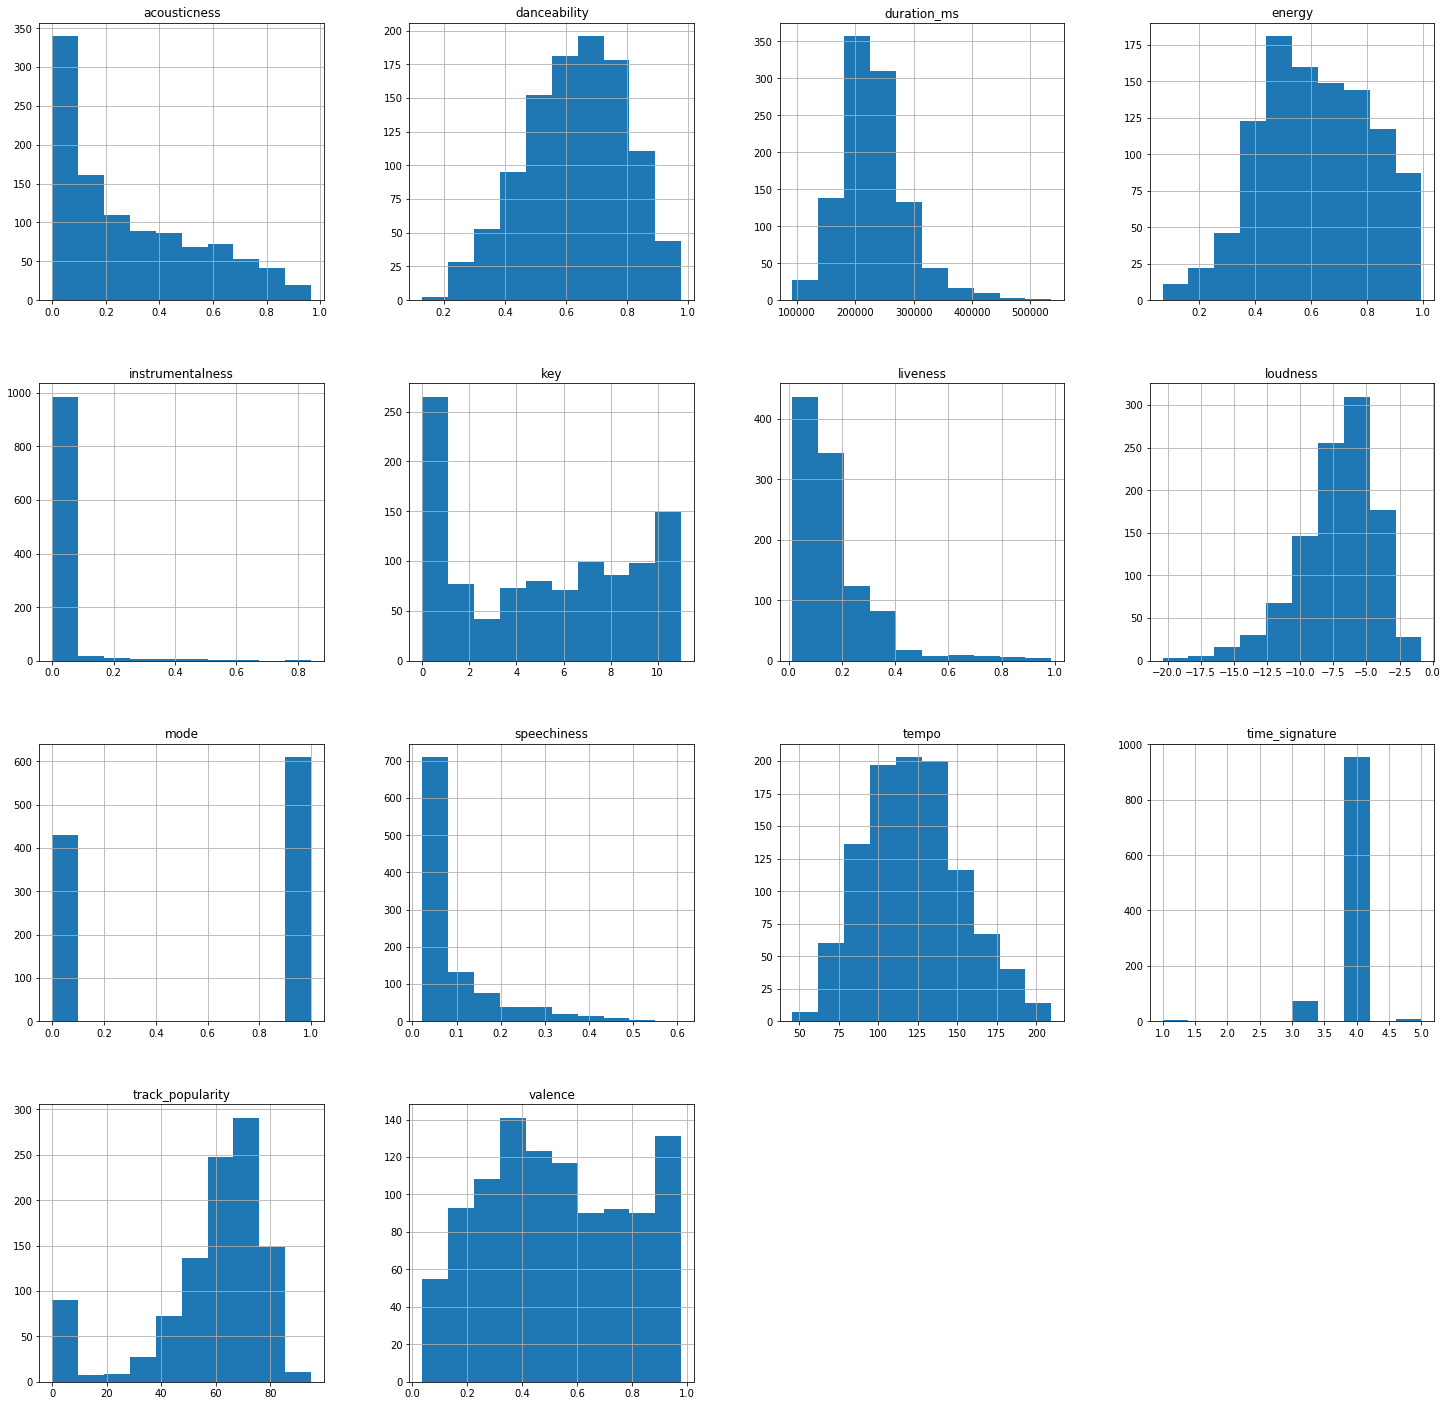

In [15]:
#Plotting histograms
playlist_df.hist(figsize=(25,25));

[Review Features](#Getting-the-features)

>The histograms above show that some variables are skewed **(acousticness, duration, energy, liveness, loudness, speechiness and track_popularity).**

In [16]:
#Statistical distribution of categorical values
playlist_df.describe(include="O")

,track_id,track_name,artist_id,artist_name
count,1040,1040,1040,1040
unique,1040,1033,421,421
top,5LH9sGAsEtE2ysKdKG7ZRh,Eres,1dKdetem2xEmjgvyymzytS,Grupo Firme
freq,1,2,56,56


In [17]:
# checking most recurrent artists in the playlist
n = 10
print("Most frequent artists names")
playlist_df['artist_name'].value_counts()[:n]

Most frequent artists names


Grupo Firme            56
The Weeknd             38
Camilo                 36
Alejandro Fernández    22
Drake                  22
Luis Miguel            20
Lana Del Rey           15
Juanes                 12
Rihanna                12
Carlos Vives           11
Name: artist_name, dtype: int64

>All of the tracks in the playlist are unique but less than half of the artist are. There's also couple of songs that have similar names, in this example is **Easy**. In terms of the most frequent values, we can see that **Grupo Firme** is the one that stands out. This can be explained by the way the playlist was created, the vast majority of the songs are made by artists I enjoy, therefore they are likely to appear more frequently. On the other hand, a significant number songs were added randomly with no particular affinity in mind. For instance **Camilo** is an artist I would listen by choice.

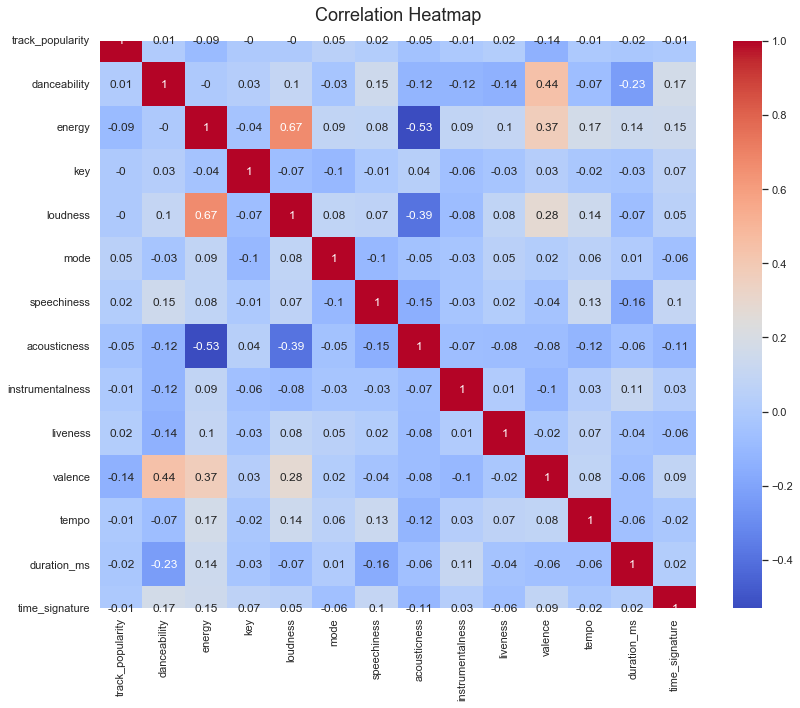

In [18]:
#Find correlations between the features
plt.figure(figsize=(12, 10))
sns.set(font_scale=1)
heatmap = sns.heatmap(round(playlist_df.corr(), 2), annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=20)
plt.tight_layout()

>**Positive correlations** between "energy and loudness". Also, "valence" is slightly correlated to "danceability, energy and loudness".On the other hand, there's **Negative correlations** between "acousticness, energy and loudness". 

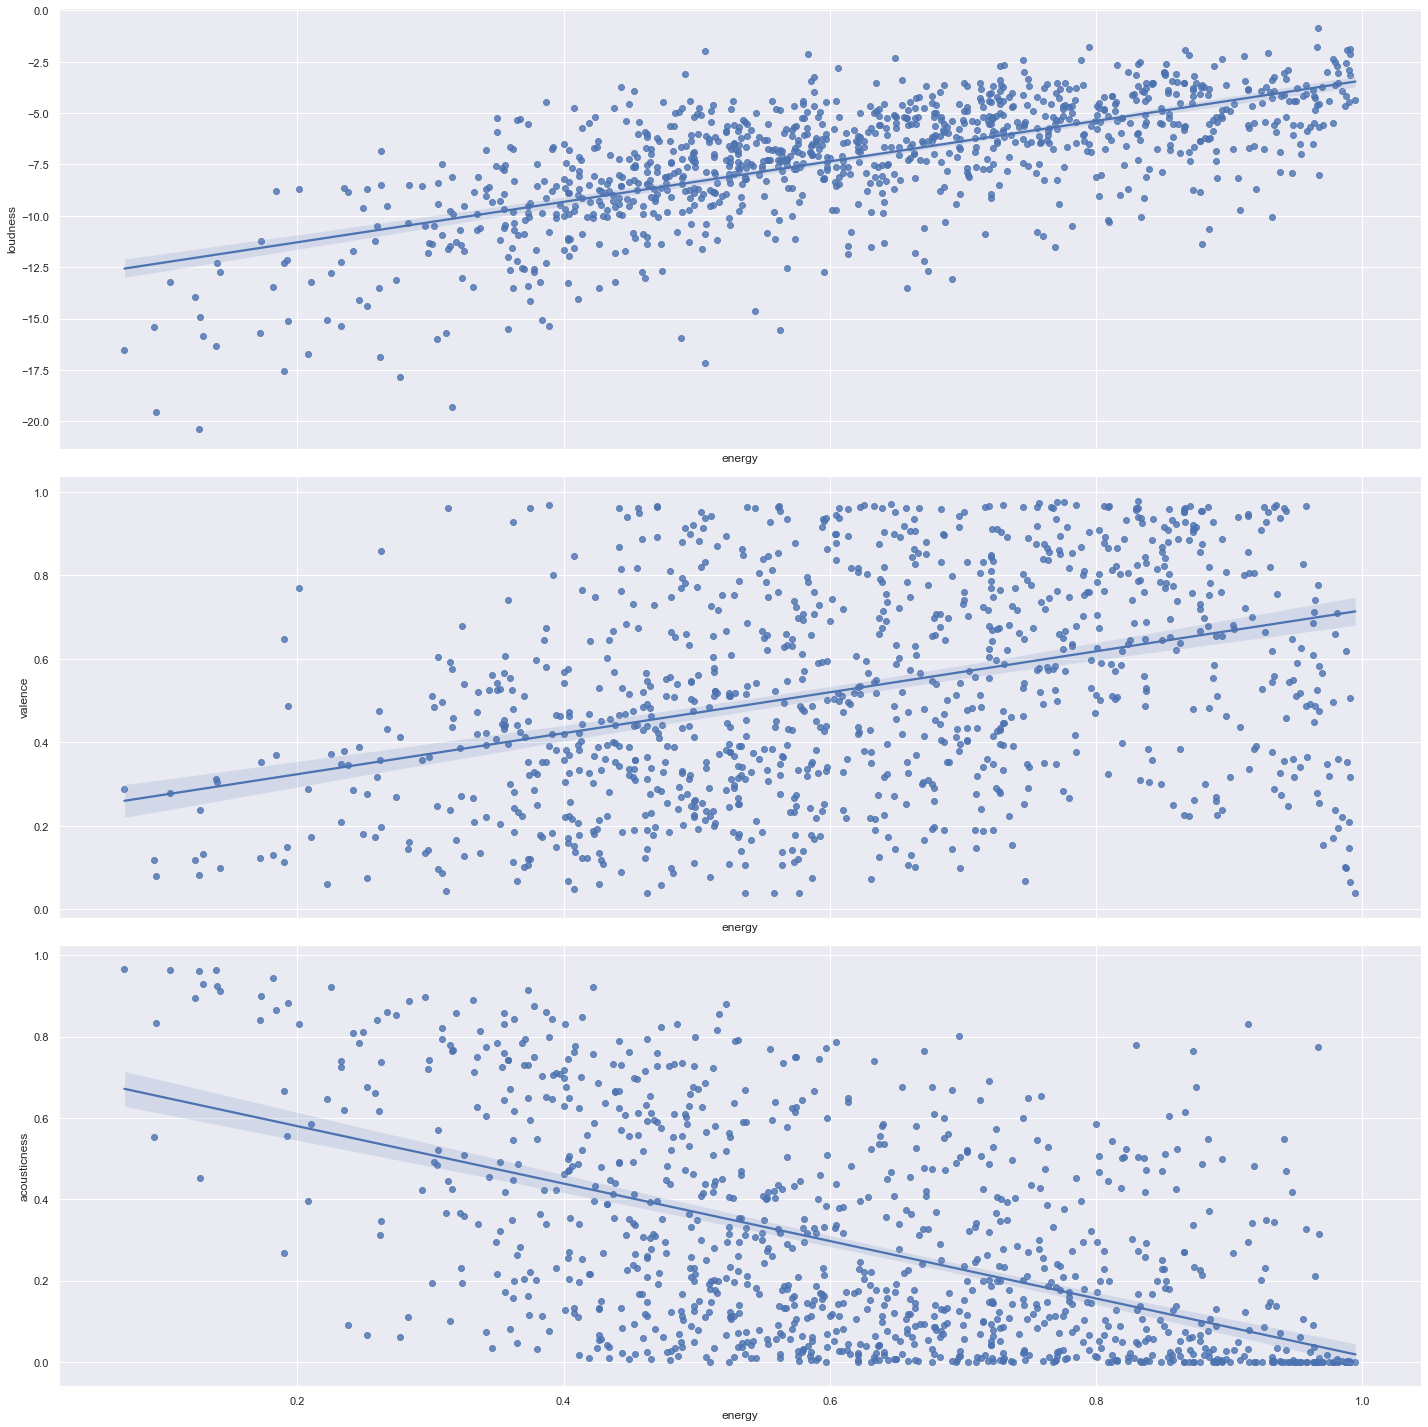

In [19]:
# scatter plot with linear regression line
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(20,20));
sns.regplot(x=playlist_df['energy'], y=playlist_df['loudness'], ax=ax1)
sns.regplot(x=playlist_df['energy'], y=playlist_df['valence'], ax=ax2)
sns.regplot(x=playlist_df['energy'], y=playlist_df['acousticness'], ax=ax3)
plt.tight_layout()

### Normalization

As seen ealier, some features had a significantly high variance in comparison with their counterparts. It is possible that the variance between genres can be explained by just a few features in the dataset. In order to move foward with dimensionality reduction, normalization will be performed by testing with two scalers, [**MinMax**](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#minmaxscaler), and [**StandardScaler**](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#standardscaler)

`MinMax Scaler`: rescales the data set such that all feature values are in the range [0, 1] as shown in the right panel below. However, this scaling compresses all inliers into the narrow range [0, 0.005].

`StandardScaler`: removes the mean and scales the data to unit variance. The scaling shrinks the range of the feature values as shown in the left figure below. However, the outliers have an influence when computing the empirical mean and standard deviation.

[Return to top](#Spotify-Clustering-Application)

In [20]:
#Make a copy of the playlist_df and extract the features
copy_df = playlist_df.copy()
scale = copy_df.iloc[:,4:]
scale

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,34,0.761,0.414,1,-5.707,1,0.1870,0.52200,0.000493,0.1300,0.764,85.874,206715,4
1,38,0.863,0.447,4,-5.367,0,0.0512,0.31200,0.000041,0.2470,0.683,115.020,217493,4
2,48,0.765,0.437,5,-8.994,0,0.0372,0.73200,0.003310,0.1670,0.667,117.990,236949,4
3,54,0.693,0.504,9,-11.621,1,0.0402,0.62800,0.400000,0.1110,0.254,105.021,237700,4
4,65,0.784,0.586,1,-3.417,1,0.1870,0.00558,0.000286,0.1060,0.656,132.169,171818,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0,0.691,0.746,9,-5.629,1,0.0854,0.14100,0.000027,0.1760,0.647,128.945,363920,4
1036,0,0.804,0.572,9,-5.844,0,0.0390,0.28100,0.000501,0.1330,0.631,120.993,296293,4
1037,0,0.825,0.588,10,-4.669,0,0.0460,0.32900,0.000000,0.0906,0.761,116.919,305000,4
1038,66,0.612,0.507,0,-7.872,1,0.0283,0.01170,0.000007,0.1120,0.352,95.018,258640,4


In [21]:
#Column names
cols = scale.columns

#### MinMax Scaler
[Return to top](#Spotify-Clustering-Application)

In [22]:
#Instantiate MinMaxScaler
scalerMM = MinMaxScaler()

In [23]:
MM_scaled = pd.DataFrame(scalerMM.fit_transform(scale))
MM_scaled.columns = cols
MM_scaled.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.357895,0.744982,0.371824,0.090909,0.751588,1.0,0.280477,0.540371,0.000585,0.118616,0.771544,0.244865,0.258173,0.75
1,0.400000,0.865407,0.407504,0.363636,0.769002,0.0,0.048934,0.322979,0.000048,0.239086,0.685474,0.422868,0.282449,0.75
2,0.505263,0.749705,0.396692,0.454545,0.583231,0.0,0.025064,0.757763,0.003926,0.156713,0.668473,0.441007,0.326271,0.75
3,0.568421,0.664699,0.469132,0.818182,0.448679,1.0,0.030179,0.650102,0.474496,0.099053,0.229625,0.361801,0.327963,0.75
4,0.684211,0.772137,0.557790,0.090909,0.868879,1.0,0.280477,0.005772,0.000339,0.093904,0.656785,0.527602,0.179571,0.75


#### Standard Scaler
[Return to top](#Spotify-Clustering-Application)

In [24]:
#Instantiate StandardScaler
scalerStd = StandardScaler()

In [25]:
SS_scaled = pd.DataFrame(scalerStd.fit_transform(scale))
SS_scaled.columns = cols
SS_scaled.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.093697,0.798556,-1.029218,-1.142175,0.511461,0.839594,1.043643,0.904848,-0.211303,-0.317236,0.910897,-1.203681,-0.435941,0.225156
1,-0.910046,1.425246,-0.861680,-0.314973,0.629095,-1.191052,-0.443157,0.100636,-0.216897,0.525917,0.598200,-0.234705,-0.245911,0.225156
2,-0.450917,0.823132,-0.912449,-0.039239,-0.625782,-1.191052,-0.596435,1.709060,-0.176462,-0.050597,0.536433,-0.135965,0.097123,0.225156
3,-0.175440,0.380763,-0.572296,1.063697,-1.534677,0.839594,-0.563589,1.310783,4.729883,-0.454158,-1.057934,-0.567127,0.110364,0.225156
4,0.329601,0.939869,-0.155990,-1.142175,1.303760,0.839594,1.043643,-1.072824,-0.213863,-0.490190,0.493968,0.335424,-1.051219,0.225156


## Unsupervised Learning Models Used
[Return to top](#Spotify-Clustering-Application)

### PCA

#### Using MinMax scaled data
[Return to top](#Spotify-Clustering-Application)<br>
[Go to MinMax scaler](#MinMax-Scaler)

In [26]:
#Instantiate the pca model
pca_mm = PCA()
pca_mm.fit(MM_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca_mm.explained_variance_ratio_

array([0.32059678, 0.15313642, 0.14012968, 0.09977329, 0.06772544,
       0.04913158, 0.04346429, 0.02999145, 0.02615192, 0.02207751,
       0.01759742, 0.01265731, 0.00936961, 0.0081973 ])

Text(0.5, 0, 'Principal Component')

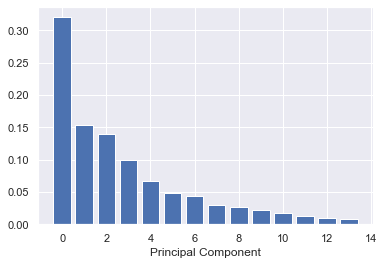

In [28]:
fig, ax = plt.subplots()
ax.bar(range(pca_mm.n_components_), pca_mm.explained_variance_ratio_)
ax.set_xlabel('Principal Component')

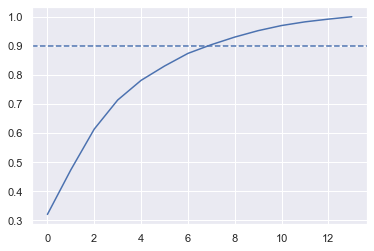

In [29]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(pca_mm.explained_variance_ratio_)

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')

#Where cum_exp_variance exceeds 0.9 and adding 1 to that indice to get n_components
n_components = ((np.where(cum_exp_variance > 0.9))[0][0]) 

>n=7 provides about 90% of the variance of the data set, the number of components can be narrowed down to 7.

In [30]:
# Perform PCA with the chosen number of components and project data onto components
pca_n7 = PCA(n_components=7)
pca_n7.fit(MM_scaled)
data_transformed_mm = pca_n7.transform(MM_scaled)

#### Using StandardScaler scaled data
[Return to top](#Spotify-Clustering-Application)<br>
[Go to StandardScaler](#Standard-Scaler)

In [31]:
#Instantiate the pca_SSmodel
pca_SS = PCA()
pca_SS.fit(SS_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
pca_SS.explained_variance_ratio_

array([0.17249627, 0.1146598 , 0.08992642, 0.08583056, 0.07611503,
       0.07190973, 0.0664874 , 0.06437356, 0.06140239, 0.05688954,
       0.05275238, 0.04342154, 0.0289895 , 0.01474586])

Text(0.5, 0, 'Principal Component')

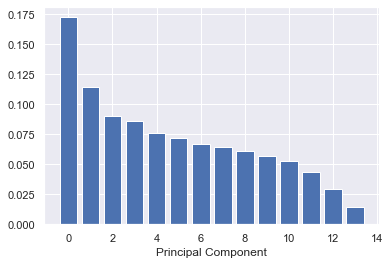

In [33]:
fig, ax = plt.subplots()
ax.bar(range(pca_SS.n_components_), pca_SS.explained_variance_ratio_)
ax.set_xlabel('Principal Component')

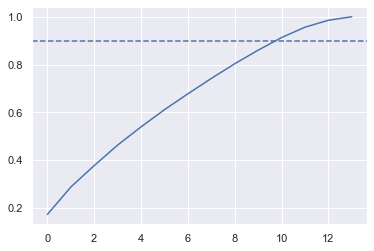

In [34]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(pca_SS.explained_variance_ratio_)

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')

#Where cum_exp_variance exceeds 0.9 and adding 1 to that indice to get n_components
n_components = ((np.where(cum_exp_variance > 0.9))[0][0]) 

>n=10 provides about 90% of the variance of the data set, the number of components can be narrowed down to 10.

In [35]:
# Perform PCA with the chosen number of components and project data onto components
pca_n10 = PCA(n_components=10)
pca_n10.fit(SS_scaled)
data_transformed_ss = pca_n10.transform(SS_scaled)

### K-Means

#### PCA - MinMaxScaler data
[Return to top](#Spotify-Clustering-Application)<br>
[Go to MinMax Scaler](#MinMax-Scaler)<br>
[Go to PCA - MinMax Scaler](#Using-MinMax-scaled-data)

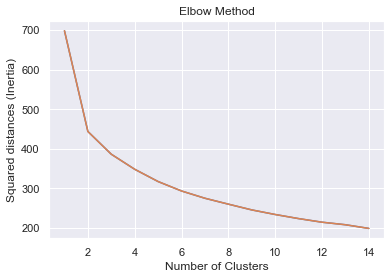

In [36]:
# finding out the proper number of clusters
squared_dist = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_transformed_mm)
    squared_dist.append(kmeans.inertia_) #the sum of squared distances of samples to their closest cluster center.
plt.plot(range(1,15), squared_dist)
plt.plot(range(1 , 15) , squared_dist)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Squared distances (Inertia)')
plt.show()

>To determine the optimal number of clusters, the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion would be the optimal number of clusters. In this case, **k=2.**

In [37]:
#Instatiating KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
km_clusters = kmeans.fit_predict(data_transformed_mm)

In [38]:
print("Silhouette Scores K-means clustering")
print(silhouette_score(data_transformed_mm, km_clusters))

Silhouette Scores K-means clustering
0.34996969049979504


#### PCA - StandardScaler data
[Return to top](#Spotify-Clustering-Application)<br>
[Go to StandardScaler](#Standard-Scaler)<br>
[Go to PCA - Standard Scaler](#Using-StandardScaler-scaled-data)

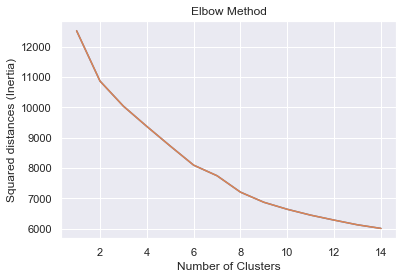

In [39]:
# finding out the proper number of clusters
squared_dist = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_transformed_ss)
    squared_dist.append(kmeans.inertia_) #the sum of squared distances of samples to their closest cluster center.
plt.plot(range(1,15), squared_dist)
plt.plot(range(1 , 15) , squared_dist)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Squared distances (Inertia)')
plt.show()

>To determine the optimal number of clusters, the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion would be the optimal number of clusters. In this case, **k=2.**

In [40]:
#Instatiating KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
km_clusters = kmeans.fit_predict(data_transformed_ss)

In [41]:
print("Silhouette Scores K-means clustering")
print(silhouette_score(data_transformed_ss, km_clusters))

Silhouette Scores K-means clustering
0.1414117507524516


#### Without PCA - MinMax Scaler
[Return to top](#Spotify-Clustering-Application)<br>
[Go to MinMax Scaler](#MinMax-Scaler)<br>
[Go to PCA - MinMax Scaler](#Using-MinMax-scaled-data)

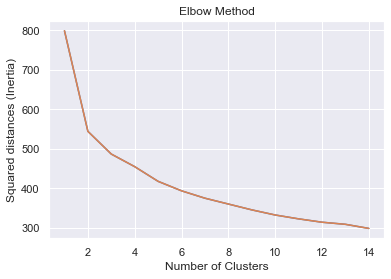

In [42]:
#finding out the proper number of clusters
squared_dist = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(MM_scaled)
    squared_dist.append(kmeans.inertia_) #the sum of squared distances of samples to their closest cluster center.
plt.plot(range(1,15), squared_dist)
plt.plot(range(1 , 15) , squared_dist)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Squared distances (Inertia)')
plt.show()

>To determine the optimal number of clusters, the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion would be the optimal number of clusters. In this case, **k=2.**

In [43]:
#Instatiating KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
km_clusters = kmeans.fit_predict(MM_scaled)

In [44]:
print("Silhouette Scores K-means clustering")
print(silhouette_score(MM_scaled, km_clusters))

Silhouette Scores K-means clustering
0.3072927570567197


#### Without PCA - StandardScaler
[Return to top](#Spotify-Clustering-Application)<br>
[Go to StandarScaler](#Standard-Scaler)<br>
[Go to PCA - StandardScaler Scaler](#Using-StandardScaler-scaled-data)

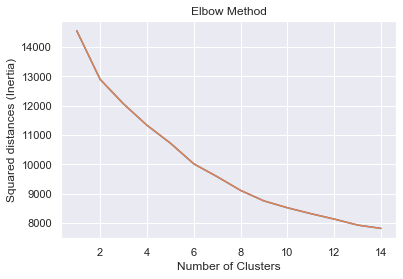

In [45]:
#finding out the proper number of clusters
squared_dist = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(SS_scaled)
    squared_dist.append(kmeans.inertia_) #the sum of squared distances of samples to their closest cluster center.
plt.plot(range(1,15), squared_dist)
plt.plot(range(1 , 15) , squared_dist)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Squared distances (Inertia)')
plt.show()

>To determine the optimal number of clusters, the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion would be the optimal number of clusters. In this case, **k=2.**

In [46]:
#Instatiating KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
km_clusters = kmeans.fit_predict(SS_scaled)

In [47]:
print("Silhouette Scores K-means clustering")
print(silhouette_score(SS_scaled, km_clusters))

Silhouette Scores K-means clustering
0.12009931425425273


### Agglomerative Clustering
[Return to top](#Spotify-Clustering-Application)<br>
[Go to MinMax Scaler](#MinMax-Scaler)<br>
[Go to PCA - MinMax Scaler](#Using-MinMax-scaled-data)<br>
[Go to StandarScaler](#Standard-Scaler)<br>
[Go to PCA - StandardScaler Scaler](#Using-StandardScaler-scaled-data)

#### PCA - MinMax data

In [48]:
ac = AgglomerativeClustering(2, linkage='average')
ac_clusters = ac.fit_predict(data_transformed_mm)

C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


In [49]:
print(silhouette_score(data_transformed_mm, ac_clusters))

0.34996969049979504


#### PCA - Standard Scaler

In [50]:
ac = AgglomerativeClustering(2, linkage='average')
ac_clusters = ac.fit_predict(data_transformed_ss)

C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


In [51]:
print(silhouette_score(data_transformed_ss, ac_clusters))

0.6027873387967762


#### Without PCA - StandardScaler

In [52]:
ac = AgglomerativeClustering(2, linkage='average')
ac_clusters = ac.fit_predict(SS_scaled)

C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


In [53]:
print(silhouette_score(SS_scaled, ac_clusters))

0.5755046660432529


#### Without PCA - MinMax Scaler

In [54]:
ac = AgglomerativeClustering(2, linkage='average')
ac_clusters = ac.fit_predict(MM_scaled)

C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


In [55]:
print(silhouette_score(MM_scaled, ac_clusters))

0.3147603326098169


## Discussion
[Return to top](#Spotify-Clustering-Application)<br>

|                 | **Kmeans - PCA MM Scaler** | **Kmeans - PCA SS scaler** | **Kmeans - MM scaler** | **Kmeans - SS scaler** | **Ag. Cl. - PCA MM scaler** | **Ag Cl. - PCA SS scaler** | **Ag. Cl. - MM scaler** | **Ag. Cl - SS scaler** |
|:---------------:|:--------------------------:|:--------------------------:|:----------------------:|:----------------------:|:---------------------------:|:--------------------------:|:-----------------------:|:----------------------:|
| k               | 2                          | 2                          | 2                      | 2                      | 2                           | 2                          | 2                       | 2                      |
| Silhoutte Score | 0.34                       | 0.14                       | 0.30                   | 0.12                   | 0.34                        | 0.60                       | 0.31                    | 0.57                   |
    
Using PCA to reduce the dimensionality showed no improvement on the Silhoutte Score specially when using Kmeans model. On the other hand, Agglomerative Clustering showed some improvement when using both PCA and the StandardScaler, however none of the models are good enough nor suitable for the use case. It's important to note that PCA is most effective when features have a strong correlation to each other. As highlighted earlier with the Correlation heatmap there were no strong correlations between features within the dataset.

Other points worth revisiting, are both the Data Collection and Normalization steps. The data may have played against the models given the differences between the wide variety of genres, creating outliers in the data as we could see in the Exploratory Analysis, which consequently brings problems in the normalization given that both StandardScaler and MinMax are very sensitive to the presence of outliers.

## Conclusions
[Return to top](#Spotify-Clustering-Application)<br>
    
Given that none of the models where satisfactory, is important to review the steps taken towards the development of the models to learn some lessons. In order to see improvements with the data at hand, this requires some balancing between the different groupings that might come in the dataset. The collection of the data was very random and didn't have a control over the the amount nor the similarity between genres, was more of a combination of 'mood playlist', which can vary significantly from one playlist to another. 

Additionally, there's a need for extra clean up. In this project, there wasn't a step that took care of the outliers. Finally, once the data is in the shape that is needed, adapt it with a scaler that best fits the data.